# Task 2
Download the Au_nanoParticle_dataset.csv and load the data of the csv file as a dataframe in a new
colab notebook. Do the below subtask with the dataset. Use any of the above libraries if needed.

1. Create a new dataframe by filtering all the columns [i.e., features] except N_total, N_bulk,
N_surface and R_avg columns.

In [1]:
import pandas as pd

# Load the dataset
df_au = pd.read_csv('resources/Au_nanoParticle_dataset.csv')
# Create the new dataframe by dropping the specified columns
new_df = df_au.drop(columns=['N_total', 'N_bulk', 'N_surface', 'R_avg'])

2. Display the first 20 samples of this dataframe.

In [2]:
print(new_df.head(20))

    ID    T       tau  time        Volume    R_min    R_max   R_diff   R_std  \
0    1  273  0.000025     1  2.710000e-26  15.5898  19.4516   3.8618  0.6230   
1    2  273  0.000025     2  2.780000e-26  15.3996  24.1755   8.7760  0.9295   
2    3  273  0.000025     3  7.850000e-26  21.9199  31.0305   9.1106  1.0701   
3    4  273  0.000025     4  1.220000e-25  23.2542  37.8795  14.6253  2.3732   
4    5  273  0.000025     5  1.860000e-25  27.1200  39.7614  12.6415  1.9397   
5    6  273  0.000025     6  2.260000e-25  33.2496  42.9612   9.7116  1.0219   
6    7  273  0.000025     7  2.340000e-25  33.6164  41.6168   8.0004  0.8979   
7    8  273  0.000025     8  2.360000e-25  34.5185  41.4386   6.9201  0.8595   
8    9  273  0.000025     9  2.370000e-25  34.7525  41.5998   6.8473  0.8483   
9   10  273  0.000025    10  2.380000e-25  34.7870  41.5401   6.7531  0.8308   
10  11  273  0.000050     1  2.600000e-26  15.0408  18.6580   3.6172  0.6360   
11  12  273  0.000050     2  2.640000e-2

3. Calculate the mean, standard deviation and quartile values for each of the above 4 features.

In [3]:
print(new_df.describe())

                ID            T          tau         time        Volume  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4.000000e+03   
mean   2000.500000   615.000000     0.000055     8.200000  5.885368e-26   
std    1154.844867   223.625808     0.000081     2.856929  6.227819e-26   
min       1.000000   273.000000     0.000000     1.000000  4.000000e-27   
25%    1000.750000   410.500000     0.000000     7.000000  1.800000e-26   
50%    2000.500000   598.000000     0.000000    10.000000  3.160000e-26   
75%    3000.250000   785.500000     0.000100    10.000000  7.620000e-26   
max    4000.000000   973.000000     0.000250    10.000000  2.420000e-25   

             R_min        R_max       R_diff        R_std       R_skew  ...  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000  ...   
mean     16.436127    26.028875     9.592748     1.786059     0.265756  ...   
std       6.761951     9.822659     6.134846     1.175161     0.554990  ...   
min     

4. Plot the histogram of each of these features in a 1x4 layout.

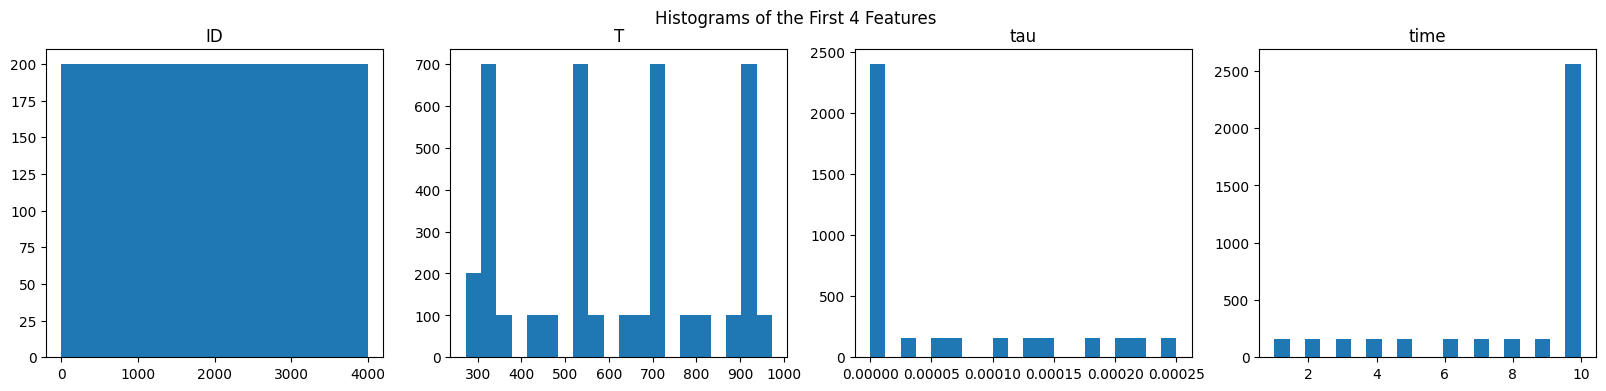

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.suptitle('Histograms of the First 4 Features')

for i, col in enumerate(new_df.columns[0:4]):
    axes[i].hist(new_df[col], bins=20)
    axes[i].set_title(col)

plt.show()

5. Visualize the scatter plots and histograms of this dataframe using the pairplot functionality
of seaborn library.

In [ ]:
import seaborn as sns

sns.pairplot(new_df)
plt.show()

KeyboardInterrupt: 